In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset (upload dulu lewat panel kiri atau Google Drive)
df = pd.read_csv('/content/covid_19_indonesia_time_series_all.csv')  # sesuaikan path


In [10]:
# Konversi kolom ke string dulu, lalu hapus % dan ubah ke float
df['Case Fatality Rate'] = df['Case Fatality Rate'].astype(str).str.replace('%', '').astype(float)
df['Case Recovered Rate'] = df['Case Recovered Rate'].astype(str).str.replace('%', '').astype(float)


In [11]:
# Tambahkan kolom klasifikasi risiko
def classify_risk(n):
    if n >= 1000:
        return 'High'
    elif n >= 100:
        return 'Medium'
    else:
        return 'Low'

df['Risk_Level'] = df['New Cases'].apply(classify_risk)

In [12]:
# Tampilkan distribusi klasifikasi
print(df['Risk_Level'].value_counts())

Risk_Level
Low       22605
Medium     7207
High       2010
Name: count, dtype: int64


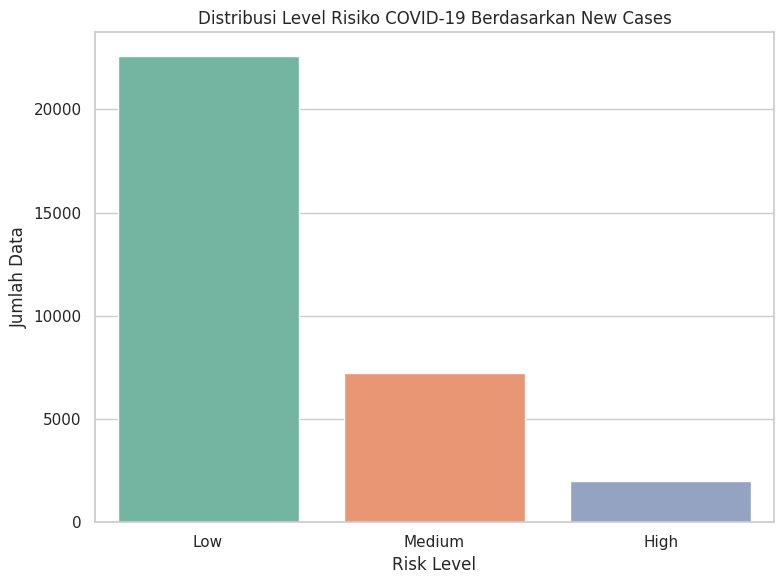

In [14]:
# Visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Risk_Level', hue='Risk_Level', palette='Set2', order=['Low', 'Medium', 'High'], legend=False)
plt.title('Distribusi Level Risiko COVID-19 Berdasarkan New Cases')
plt.xlabel('Risk Level')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()

# Bagian Baru